In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from skopt.space import Integer
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = np.load('../bases/Titanic.npz', allow_pickle=True)
X_treino, X_teste, y_treino, y_teste, feature_names = data['X_treino'], data['X_teste'], data['y_treino'], data['y_teste'], list(data['feature_names'])

In [9]:
param_bayes = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'n_estimators': Integer(50, 120),
    'max_features': Integer(2, 5)
}

In [10]:
bayes_search = BayesSearchCV(RandomForestClassifier(), param_bayes, n_iter=50, cv=5, scoring='accuracy', random_state=42)
bayes_search.fit(X_treino, y_treino)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 6, 'min_samples_split': 18, 'n_estimators': 53})
Melhor pontuação de validação cruzada: 0.83


In [11]:
best_model_bayes = bayes_search.best_estimator_
previsoes_bayes = best_model_bayes.predict(X_teste)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
accuracy_score(y_teste,previsoes_bayes)

0.7982062780269058

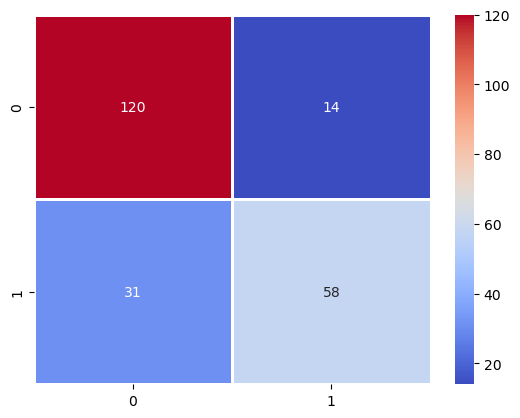

In [18]:
cfm_matrix = confusion_matrix(y_teste,previsoes_bayes)
sns.heatmap(cfm_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

In [ ]:
print(classification_report(y_teste, previsoes_bayes))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       134
           1       0.81      0.65      0.72        89

    accuracy                           0.80       223
   macro avg       0.80      0.77      0.78       223
weighted avg       0.80      0.80      0.79       223



Variáveis mais relevantes:
Sex: 0.4818415770042492
Fare: 0.20972437138119635
Pclass: 0.1293652484935426
Age: 0.115999083880883
SibSp: 0.034120011032207485
Parch: 0.028949708207921327


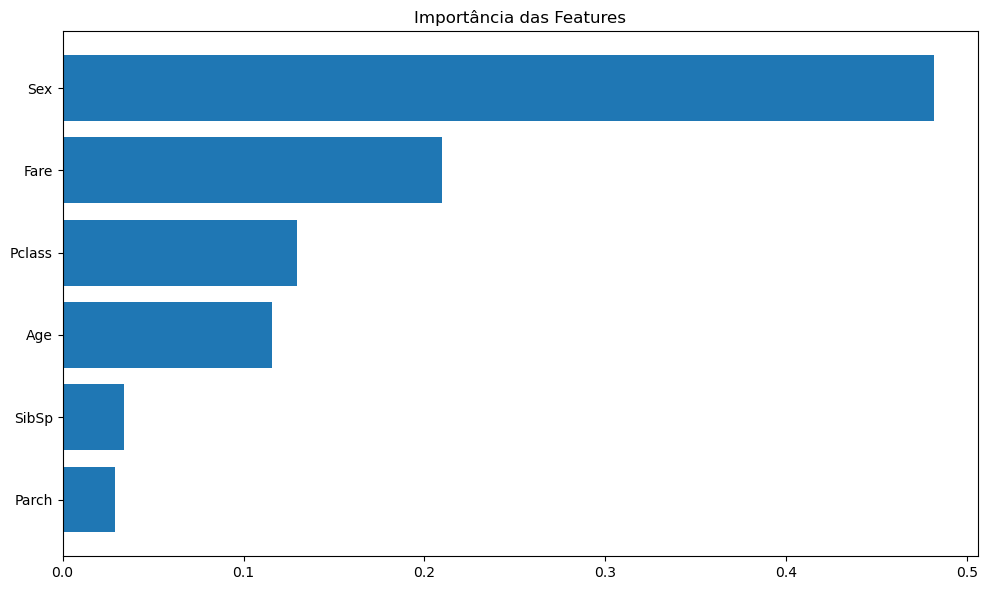

In [26]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()